# Data Splitting and Resampling

In [94]:
# For data processing
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight') 
sb.set()

# For data splitting
from sklearn.model_selection import train_test_split

# For handling imbalanced dataset
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [95]:
data=pd.read_csv('newairbnb.csv')
columns_to_drop = ['Unnamed: 0', 'latitude', 'longitude']
data.drop(columns_to_drop, axis=1, inplace=True)
sample = data.select_dtypes(exclude=['object'])
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36744 entries, 0 to 36743
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           36744 non-null  int64  
 1   minimum_nights                  36744 non-null  int64  
 2   number_of_reviews               36744 non-null  int64  
 3   reviews_per_month               36744 non-null  float64
 4   calculated_host_listings_count  36744 non-null  int64  
 5   availability_365                36744 non-null  int64  
 6   distance_from_center            36744 non-null  float64
 7   room_type_encoded               36744 non-null  int64  
 8   neighbourhood_group_encoded     36744 non-null  int64  
 9   booking_density                 36744 non-null  float64
 10  availability_ratio              36744 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 3.1 MB


In [96]:
sample.describe()['price']

count    36744.000000
mean       117.328543
std         65.051133
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        321.000000
Name: price, dtype: float64

In [97]:
#Defining the independent variables and dependent variables
x = sample.drop('price', axis=1)
y = sample['price']

y = (sample['price'] > sample['price'].mean()).astype('int64')

#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=20)
x_train.shape

(25720, 10)

In [98]:
print("Above Median vs Below Median Airbnb Price Train Set Proportion")
print(y_train.value_counts()[1], ':', y_train.value_counts()[0])

Above Median vs Below Median Airbnb Price Train Set Proportion
10822 : 14898


## Random oversampling on training data

In [99]:
# Define oversampling strategy (creates 1:2 ratio)
over_smp = RandomOverSampler(sampling_strategy=1.0, random_state=20)

# Fit and apply the transform
x_res1, y_res1 = over_smp.fit_resample(x_train, y_train)

In [100]:
print("Above Median vs Below Median Airbnb Pricing Train Set Proportion (After oversampling)")
print(y_res1.value_counts()[1], ':', y_res1.value_counts()[0])

Above Median vs Below Median Airbnb Pricing Train Set Proportion (After oversampling)
14898 : 14898


## SMOTETomek Resampling on training data

In [101]:
# Set random_state for reproducibility
smt = SMOTETomek(random_state=20)
x_res2, y_res2 = smt.fit_resample(x_train, y_train)

In [102]:
print("Above Median vs Below Median Airbnb Pricing Train Set Proportion (After SMOTETomek oversampling)")
print(y_res2.value_counts()[1], ':', y_res2.value_counts()[0])

Above Median vs Below Median Airbnb Pricing Train Set Proportion (After SMOTETomek oversampling)
13199 : 13199


## SMOTEENN Resampling on training data

In [103]:
# Set random_state for reproducibility
sme = SMOTEENN(random_state=20)
x_res3, y_res3 = sme.fit_resample(x_train, y_train)

In [104]:
print("Above Median vs Below Median Airbnb Pricing Train Set Proportion (After SMOTEEN oversampling)")
print(y_res3.value_counts()[1], ':', y_res3.value_counts()[0])

Above Median vs Below Median Airbnb Pricing Train Set Proportion (After SMOTEEN oversampling)
6703 : 5541


# Machine Learning - XGBoost

In [105]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import math

In [106]:
# rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg3 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

### Train Dataset

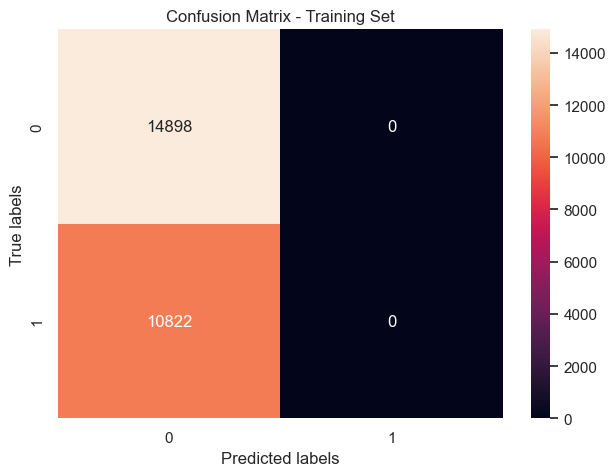

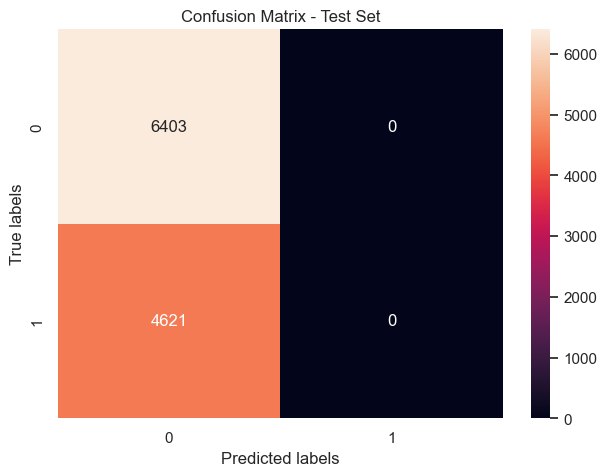

In [107]:
def plot_confusion_matrix(conf_matrix, title):
    sb.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Set a threshold to classify predictions
threshold = 150  # Example threshold value

# Fit the XGBoost model to the training data
xg_reg.fit(x_train, y_train)

y_train_pred = xg_reg.predict(x_train)
y_test_pred = xg_reg.predict(x_test)

# Convert continuous predictions into binary classes
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix for training set
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix - Training Set')

# Plot confusion matrix for test set
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix - Test Set')

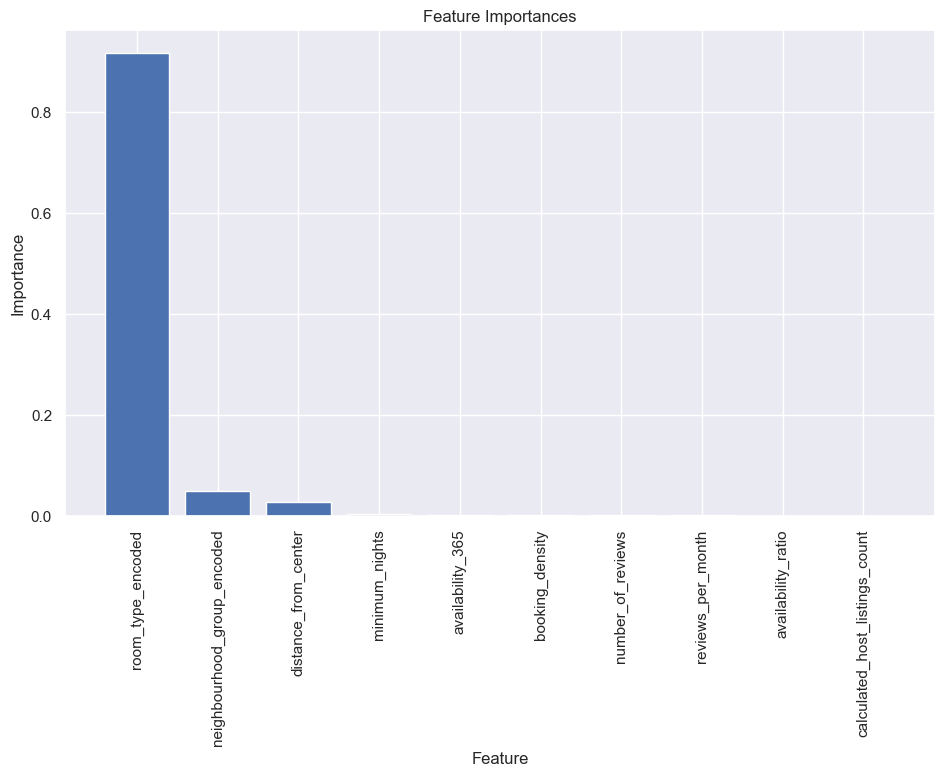

In [108]:
# Get feature importances
importances = xg_reg.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=x_train.columns[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [109]:
# Predict on the test set
y_test_pred = xg_reg.predict(x_test)

# Root Mean Squared Error on train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error on train:", rmse_train)

# Root Mean Squared Error on test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test:", rmse_test)

# Median Error Percentage
y_test = pd.DataFrame(y_test, dtype=float)
y_test = y_test.sort_index()

predictions = pd.DataFrame(xg_reg.predict(x_test), index=x_test.index, columns=['price'])
predictions = predictions.sort_index()

perc_error = abs((y_test - predictions) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage:", perc_error['price'].median(), "%")

# Error Margin
mse = mean_squared_error(y_test, predictions)
error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

Root Mean Squared Error on train: 0.42154058933992855
Root Mean Squared Error on test: 0.4229778505949674
Median Error Percentage: 47.33990430831909 %
Error Margin: 0.4229778505949674


### Oversampling Dataset

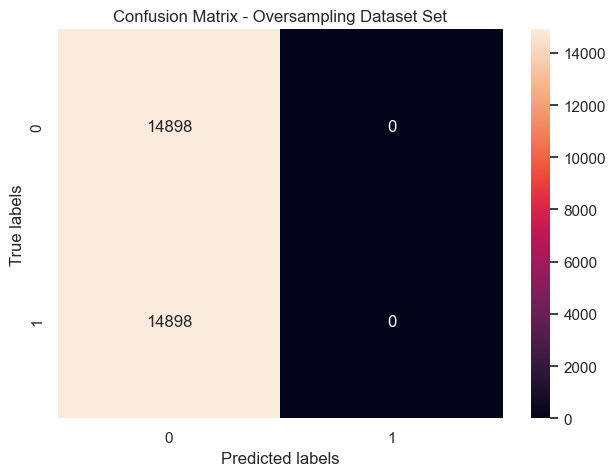

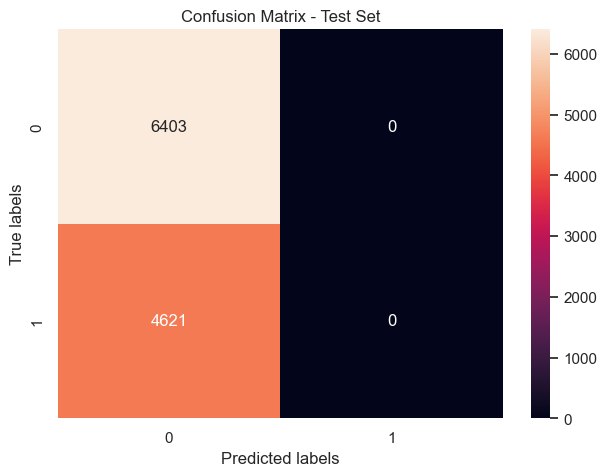

In [110]:
xg_reg1.fit(x_res1, y_res1)

y_res1_pred = xg_reg1.predict(x_res1)
y_test_pred = xg_reg1.predict(x_test)

# Convert continuous predictions into binary classes
y_res1_pred_binary = (y_res1_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_res1, y_res1_pred_binary)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix for training set
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix - Oversampling Dataset Set')

# Plot confusion matrix for test set
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix - Test Set')

In [111]:
# Root Mean Squared Error on train
rmse_train = np.sqrt(mean_squared_error(y_res1, y_res1_pred))
print("Root Mean Squared Error on train:", rmse_train)

# Root Mean Squared Error on test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test:", rmse_test)

predictions = pd.DataFrame(xg_reg1.predict(x_test), index=x_test.index, columns=['price'])
predictions = predictions.sort_index()

perc_error = abs((y_test - predictions) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage:", perc_error['price'].median(), "%")

# Error Margin
mse = mean_squared_error(y_test, predictions)
error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

Root Mean Squared Error on train: 0.42464008989677066
Root Mean Squared Error on test: 0.5141737192468275
Median Error Percentage: 40.143781900405884 %
Error Margin: 0.42638355533817845


### Resampling with SMOTETomek

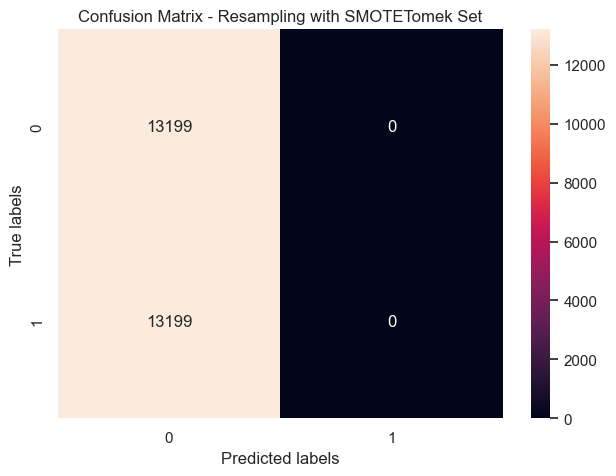

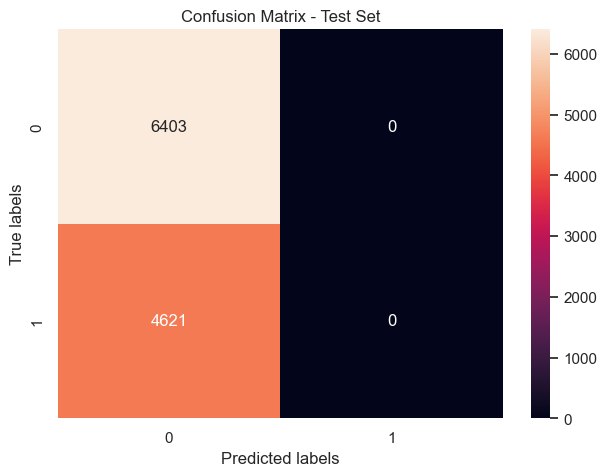

In [112]:
# Fit the XGBoost model to the training data
xg_reg2.fit(x_res2, y_res2)

y_res2_pred = xg_reg2.predict(x_res2)
y_test_pred = xg_reg2.predict(x_test)

# Convert continuous predictions into binary classes
y_res2_pred_binary = (y_res2_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_res2, y_res2_pred_binary)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix for training set
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix - Resampling with SMOTETomek Set')

# Plot confusion matrix for test set
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix - Test Set')

In [113]:
# Root Mean Squared Error on train
rmse_train = np.sqrt(mean_squared_error(y_res2, y_res2_pred))
print("Root Mean Squared Error on train:", rmse_train)

# Root Mean Squared Error on test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test:", rmse_test)

predictions = pd.DataFrame(xg_reg2.predict(x_test), index=x_test.index, columns=['price'])
predictions = predictions.sort_index()

perc_error = abs((y_test - predictions) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage:", perc_error['price'].median(), "%")

# Error Margin
mse = mean_squared_error(y_test, predictions)
error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

Root Mean Squared Error on train: 0.41092086215184465
Root Mean Squared Error on test: 0.5164372628003742
Median Error Percentage: 39.08318877220154 %
Error Margin: 0.4217809457042472


### Resampling with SMOTEEN

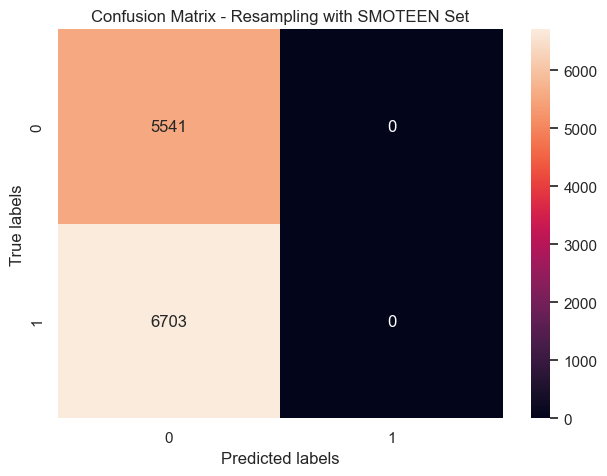

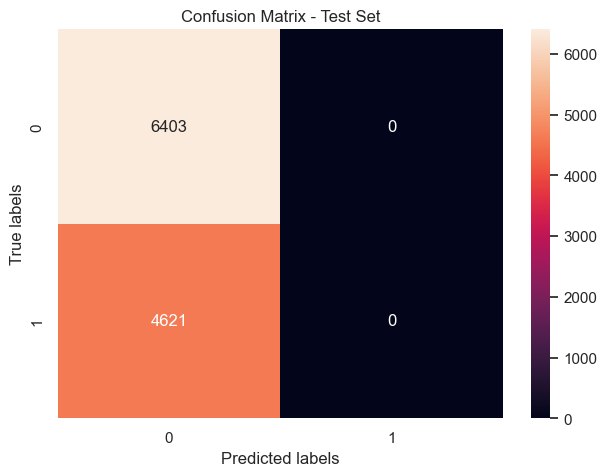

In [114]:
xg_reg3.fit(x_res3, y_res3)

y_res3_pred = xg_reg3.predict(x_res3)
y_test_pred = xg_reg3.predict(x_test)

# Convert continuous predictions into binary classes
y_res3_pred_binary = (y_res3_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_res3, y_res3_pred_binary)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix for training set
plot_confusion_matrix(conf_matrix_train, 'Confusion Matrix - Resampling with SMOTEEN Set')

# Plot confusion matrix for test set
plot_confusion_matrix(conf_matrix_test, 'Confusion Matrix - Test Set')

In [115]:
# Root Mean Squared Error on train
rmse_train = np.sqrt(mean_squared_error(y_res3, y_res3_pred))
print("Root Mean Squared Error on train:", rmse_train)

# Root Mean Squared Error on test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error on test:", rmse_test)

# Median Error Percentage
y_test = pd.DataFrame(y_test, dtype=float)
y_test = y_test.sort_index()

x_test.reset_index(drop=True, inplace=True)
predictions = pd.DataFrame(xg_reg3.predict(x_res3.iloc[:y_test.shape[0]]), index=y_test.index, columns=['price'])
predictions = predictions.sort_index()

perc_error = abs((y_test - predictions) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage:", perc_error['price'].median(), "%")

# Error Margin
mse = mean_squared_error(y_test, predictions)
error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

Root Mean Squared Error on train: 0.34910442527687147
Root Mean Squared Error on test: 0.5323959752007422
Median Error Percentage: 47.78857231140137 %
Error Margin: 0.5474677342637867


# Machine Learning - Random Forest Regression

## Train Dataset

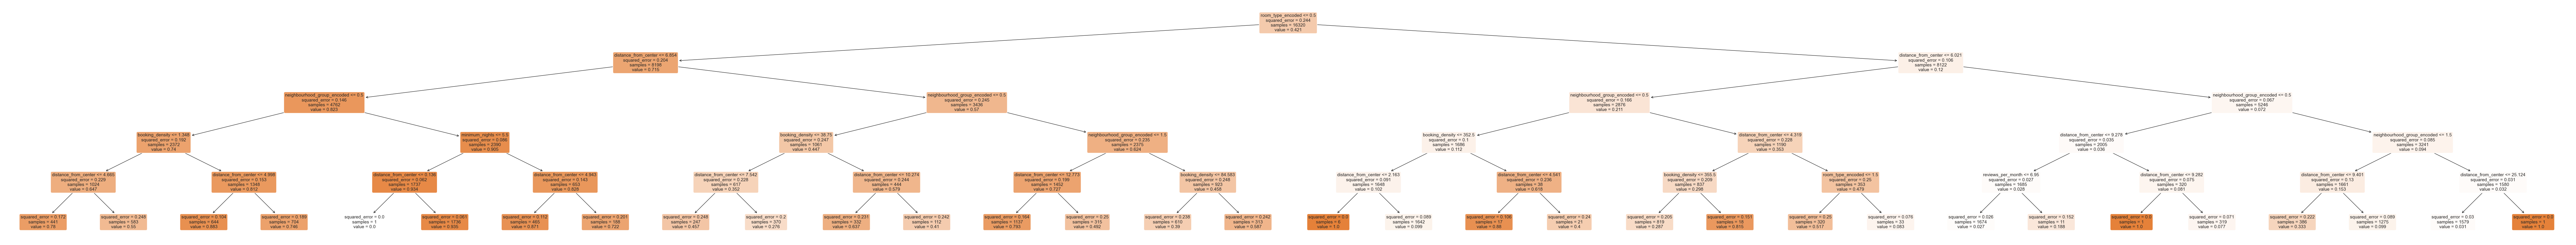

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_regressor.fit(x_train, y_train)

# Get the first tree from the RandomForestRegressor
tree = rf_regressor.estimators_[0]

# Convert Index object to a list
feature_names = x_train.columns.tolist()

plt.figure(figsize=(100,10))
plot_tree(tree, feature_names=feature_names, filled=True, rounded=True)

plt.show()

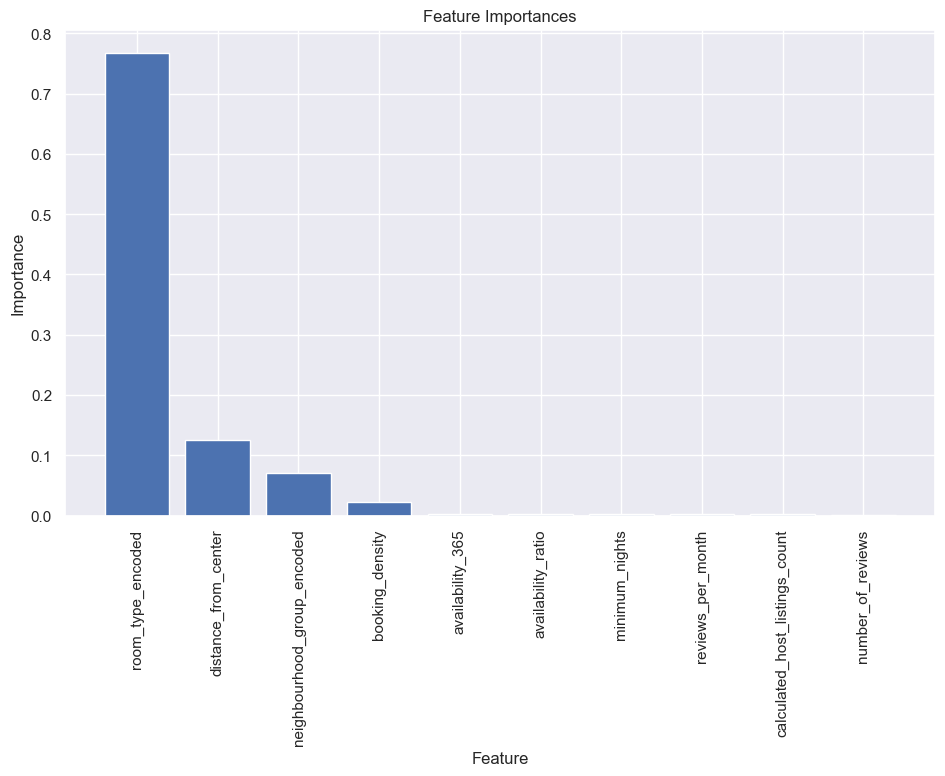

In [117]:
# Get feature importances
importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=x_train.columns[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [120]:
y_train = pd.DataFrame(y_train, dtype = float)
y_train = y_train.sort_index()

y_test = pd.DataFrame(y_test, dtype = float)
y_test = y_test.sort_index()

y_train_pred = pd.DataFrame(rf_regressor.predict(x_train), index = x_train.index, columns = ['price'])
y_train_pred = y_train_pred.sort_index()

y_test_pred = pd.DataFrame(rf_regressor.predict(x_test), index = x_test.index, columns = ['price'])
y_test_pred = y_test_pred.sort_index()

print ("For train set:")

mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_train - y_train_pred) / y_train) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

print ()

print ("For test set:")

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_test - y_test_pred) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin \t:", error_margin)

For train set:
Mean Squared Error (MSE) 	: 0.12392557445152784
Root Mean Squared Error (RMSE) 	: 0.35203064419383695
Median Error Percentage 	: 19.687098971935523 %
Error Margin: 0.35203064419383695

For test set:
Mean Squared Error (MSE) 	: 0.36102659303936124
Root Mean Squared Error (RMSE) 	: 0.6008548851755815
Median Error Percentage 	: 61.61718570751216 %
Error Margin 	: 0.6008548851755815


## Oversampling Dataset

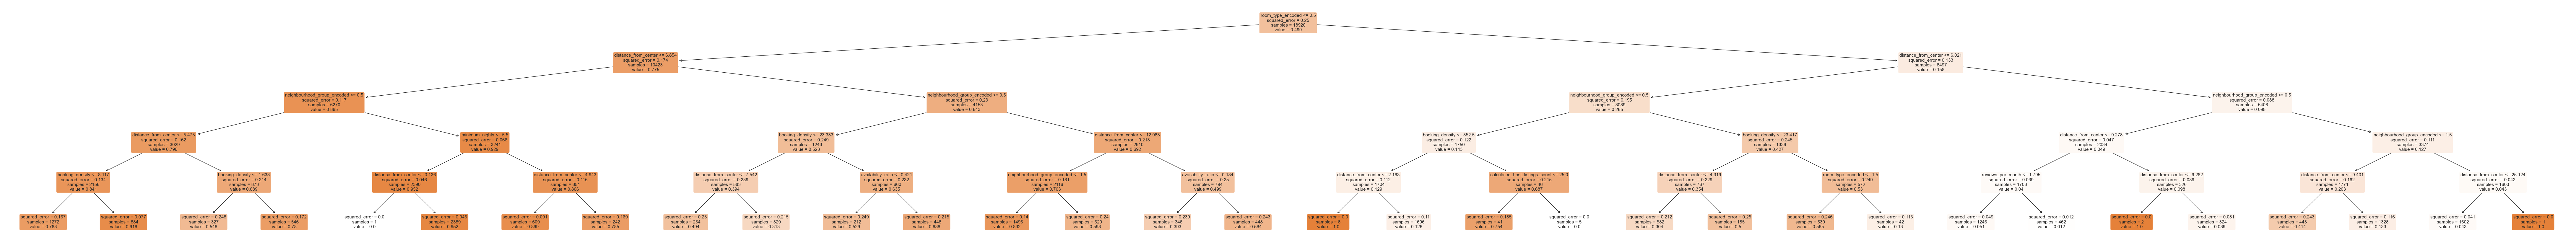

In [121]:
rf_regressor1 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_regressor1.fit(x_res1, y_res1)

# Get the first tree from the RandomForestRegressor
tree1 = rf_regressor1.estimators_[0]

# Convert Index object to a list
feature_names = x_res1.columns.tolist()

plt.figure(figsize=(100,10))
plot_tree(tree1, feature_names=feature_names, filled=True, rounded=True)

plt.show()

In [122]:
y_res1 = pd.DataFrame(y_res1, dtype = float)
y_res1 = y_res1.sort_index()

y_test = pd.DataFrame(y_test, dtype = float)
y_test = y_test.sort_index()

y_res1_pred = pd.DataFrame(rf_regressor1.predict(x_res1), index = x_res1.index, columns = ['price'])
y_res1_pred = y_res1_pred.sort_index()

y_test_pred = pd.DataFrame(rf_regressor1.predict(x_test), index = x_test.index, columns = ['price'])
y_test_pred = y_test_pred.sort_index()

print ("For train set:")

mse = mean_squared_error(y_res1, y_res1_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_res1 - y_res1_pred) / y_res1) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

print ()

print ("For test set:")

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_test - y_test_pred) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

For train set:
Mean Squared Error (MSE) 	: 0.12513164355392892
Root Mean Squared Error (RMSE) 	: 0.3537395137017194
Median Error Percentage 	: 15.801979650648935 %
Error Margin: 0.3537395137017194

For test set:
Mean Squared Error (MSE) 	: 0.3671899903935292
Root Mean Squared Error (RMSE) 	: 0.6059620370893949
Median Error Percentage 	: 55.191914499304076 %
Error Margin: 0.6059620370893949


## Resampling with SMOTETomeek

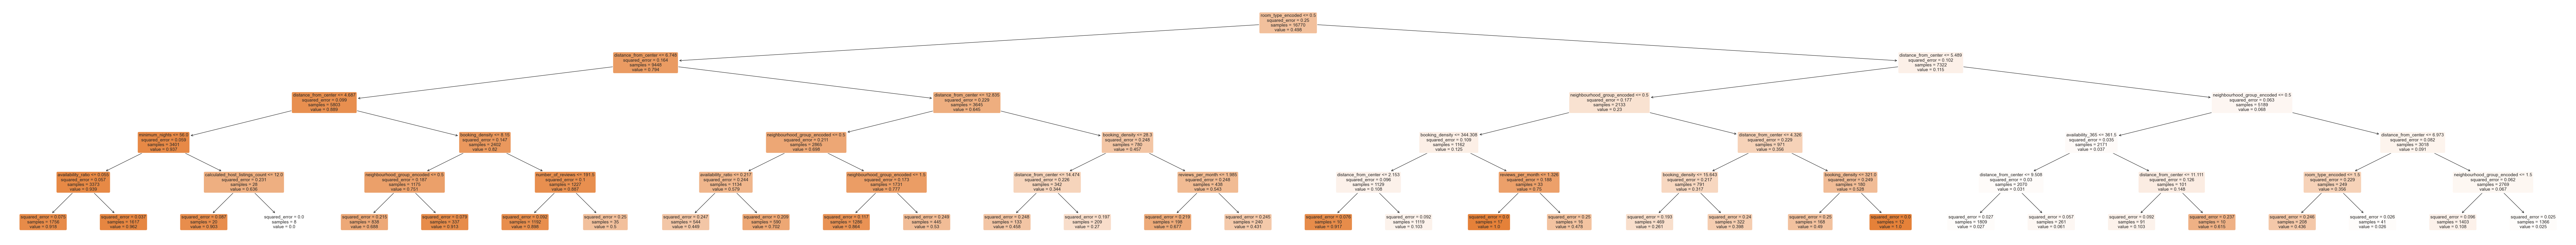

In [123]:
rf_regressor2 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_regressor2.fit(x_res2, y_res2)

# Get the first tree from the RandomForestRegressor
tree2 = rf_regressor2.estimators_[0]

# Convert Index object to a list
feature_names = x_res2.columns.tolist()

plt.figure(figsize=(100,10))
plot_tree(tree2, feature_names=feature_names, filled=True, rounded=True)

plt.show()

In [124]:
y_res2 = pd.DataFrame(y_res2, dtype = float)
y_res2 = y_res2.sort_index()

y_test = pd.DataFrame(y_test, dtype = float)
y_test = y_test.sort_index()

y_res2_pred = pd.DataFrame(rf_regressor2.predict(x_res2), index = x_res2.index, columns = ['price'])
y_res2_pred = y_res2_pred.sort_index()

y_test_pred = pd.DataFrame(rf_regressor2.predict(x_test), index = x_test.index, columns = ['price'])
y_test_pred = y_test_pred.sort_index()

print ("For train set:")

mse = mean_squared_error(y_res2, y_res2_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_res2 - y_res2_pred) / y_res2) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

print ()

print ("For test set:")

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_test - y_test_pred) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

For train set:
Mean Squared Error (MSE) 	: 0.1058333852275237
Root Mean Squared Error (RMSE) 	: 0.3253204346909731
Median Error Percentage 	: 12.160516967760614 %
Error Margin: 0.3253204346909731

For test set:
Mean Squared Error (MSE) 	: 0.3826716965524931
Root Mean Squared Error (RMSE) 	: 0.6186046367046509
Median Error Percentage 	: 59.08042943523384 %
Error Margin: 0.6186046367046509


## Resampling with SMOTEEN

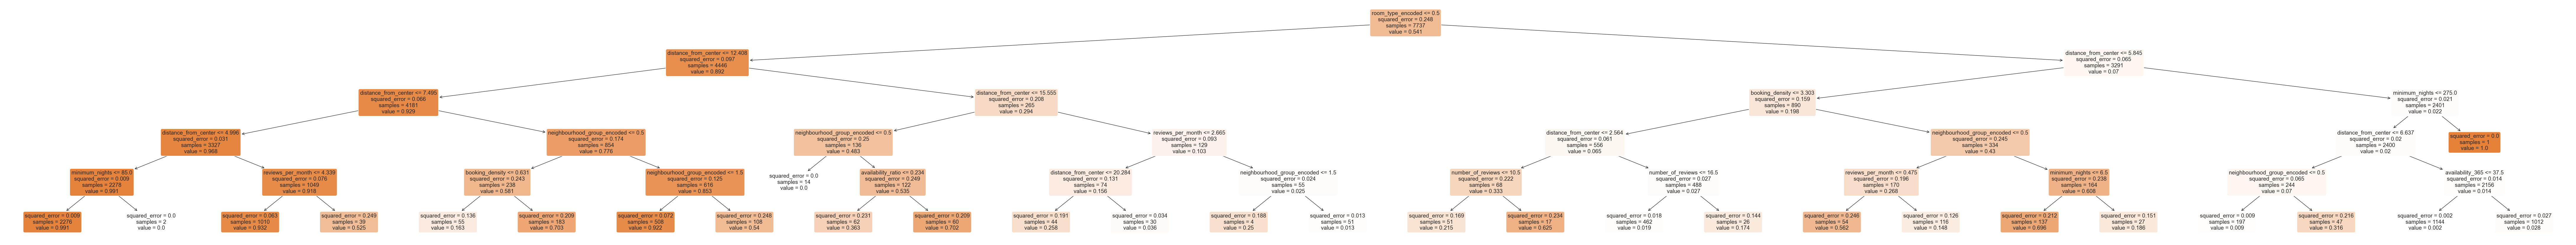

In [125]:
rf_regressor3 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
rf_regressor3.fit(x_res3, y_res3)

# Get the first tree from the RandomForestRegressor
tree3 = rf_regressor3.estimators_[0]

# Convert Index object to a list
feature_names = x_res3.columns.tolist()

plt.figure(figsize=(100,10))
plot_tree(tree3, feature_names=feature_names, filled=True, rounded=True)

plt.show()

In [127]:
y_res3 = pd.DataFrame(y_res3, dtype = float)
y_res3 = y_res3.sort_index()

y_test = pd.DataFrame(y_test, dtype = float)
y_test = y_test.sort_index()

y_res3_pred = pd.DataFrame(rf_regressor3.predict(x_res3), index = x_res3.index, columns = ['price'])
y_res3_pred = y_res3_pred.sort_index()

y_test_pred = pd.DataFrame(rf_regressor2.predict(x_test), index = x_test.index, columns = ['price'])
y_test_pred = y_test_pred.sort_index()

print ("For train set:")

mse = mean_squared_error(y_res3, y_res3_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_res3 - y_res3_pred) / y_res3) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

print ()

print ("For test set:")

mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mse))

perc_error = abs((y_test - y_test_pred) / y_test) * 100
perc_error.replace([np.inf, -np.inf], np.nan, inplace=True)
perc_error = perc_error.dropna()

print("Median Error Percentage \t:", perc_error['price'].median(), "%")

error_margin = math.sqrt(mse)
print("Error Margin:", error_margin)

For train set:
Mean Squared Error (MSE) 	: 0.04671667931718184
Root Mean Squared Error (RMSE) 	: 0.2161404157421324
Median Error Percentage 	: 1.3936357563003932 %
Error Margin: 0.2161404157421324

For test set:
Mean Squared Error (MSE) 	: 0.3826716965524931
Root Mean Squared Error (RMSE) 	: 0.6186046367046509
Median Error Percentage 	: 59.08042943523384 %
Error Margin: 0.6186046367046509
